## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [164]:
import pandas as pd
import numpy as np

In [100]:
apps = pd.read_csv('datasets/apps.csv')

In [101]:
reviews = pd.read_csv('datasets/user_reviews.csv')

In [80]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [81]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [82]:
print(f'The number of rows in apps is {len(apps)}')

The number of rows in apps is 9659


In [83]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Unnamed: 0 is an index but I do not need

In [117]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [118]:
apps.drop(columns='Unnamed: 0', inplace= True)

## Data Cleaning

#### Checking if there is duplication

In [84]:
apps.duplicated().value_counts()

False    9659
dtype: int64

#### Checking missing values and how to do

In [85]:
apps.isna().any()

Unnamed: 0        False
App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [86]:
apps_drop = apps.dropna()

In [87]:
len(apps_drop)

7021

In [90]:
print(f'original Data rows {len(apps)}, If all none values are droped {len(apps_drop)}, we loose the data {len(apps)-len(apps_drop)}')

original Data rows 9659, If all none values are droped 7021, we loose the data 2638


#### we will loose too much data, if we drop all the none values. So Let us do something other things first

---

#### First of all, the column 'Installs' can be numeric

In [102]:
apps.Installs.isna().value_counts()

False    9659
Name: Installs, dtype: int64

#### Removing '+' ','

In [106]:
chars_to_remove = ['+',',']
for char in chars_to_remove:
    apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(char, ''))

apps.Installs

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9654        5000
9655         100
9656        1000
9657        1000
9658    10000000
Name: Installs, Length: 9659, dtype: object

#### change the data type as float

In [109]:
apps.Installs = apps.Installs.astype('float64')

In [111]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [113]:
apps.Price.value_counts()

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

#### Price can be also a numeric. 

In [114]:
apps.Price = apps.Price.apply(lambda x : x.replace('$',''))

In [115]:
apps.Price = apps.Price.astype('float64')

In [137]:
apps.Price.agg(['mean','median','max','min'])

mean        1.099299
median      0.000000
max       400.000000
min         0.000000
Name: Price, dtype: float64

In [138]:
len(apps[apps.Price == 0])/len(apps)

0.9217310280567347

### most of Apps which people download are free(about 92.17%)

---

### Let us see more about paid App

<AxesSubplot:xlabel='Price'>

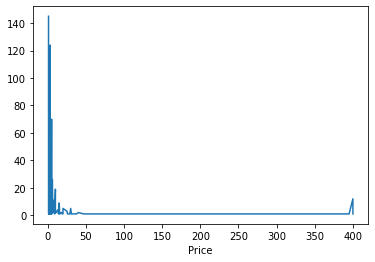

In [148]:
apps[apps.Price !=0].groupby('Price').App.count().plot()

In [152]:
paid = apps[apps.Price !=0]

In [156]:
paid.Price.describe()

count    756.000000
mean      14.045146
std       58.743615
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

#### average of paid App is 14 dollars but the standard deviation is too high, and median is 2.99 dollars.

#### If someone make a paid App, It would be nice to set the price below 1.5 dollars so that the Targeting of market for paid app can me more than 75% volume

###  Categories

In [159]:
apps.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [167]:
cat = apps.groupby('Category').App.count().sort_values( ascending = False)

In [169]:
cat= pd.DataFrame(cat)

In [178]:
cat['Percent'] = round(cat.App/cat.App.sum()*100,2)

In [179]:
cat

,App,Percent
Category,,
FAMILY,1832,18.97
GAME,959,9.93
TOOLS,827,8.56
BUSINESS,420,4.35
MEDICAL,395,4.09
PERSONALIZATION,376,3.89
PRODUCTIVITY,374,3.87
LIFESTYLE,369,3.82
FINANCE,345,3.57


#### nearly 20% of the Category is 'Family'

In [202]:
fam = apps[(apps.Category == 'FAMILY')]

In [203]:
fam_paid = apps[(apps.Category == 'FAMILY')&(apps.Type == 'Paid')]

In [204]:
print(f'about {round(len(fam_paid)/len(fam)*100,2)}% of Family apps are paid app')

about 9.99% of Family apps are paid app


In [205]:
game = apps[(apps.Category == 'GAME')]

In [206]:
game_paid = apps[(apps.Category == 'GAME')&(apps.Type == 'Paid')]

In [207]:
print(f'about {round(len(game_paid)/len(game)*100,2)}% of Family apps are paid app')

about 8.55% of Family apps are paid app


In [208]:
fam_paid.Price.mean()

13.113989071038167

In [209]:
game_paid.Price.mean()

3.467195121951223

In [210]:
fam_paid.Price.sum()

2399.86

In [211]:
game_paid.Price.sum()

284.31000000000006

#### I thought People would spend more money for the Game but people pay more for the Family app.

#### but there are many "in-app purchase". And We do not know that the Price column includes the amount of "in-app purchase" as well

In [213]:
import matplotlib.pyplot as plt

In [216]:
categories = apps.Category.unique()

In [227]:
avg_price_per_cat = {}
for i in categories:
    avg = apps[(apps['Category'] == i)&(apps['Type'] == 'Paid')].Price.mean()
    avg_price_per_cat[i] = avg

In [228]:
avg_price_per_cat

{'ART_AND_DESIGN': 1.99,
 'AUTO_AND_VEHICLES': 4.49,
 'BEAUTY': nan,
 'BOOKS_AND_REFERENCE': 4.277499999999999,
 'BUSINESS': 14.6075,
 'COMICS': nan,
 'COMMUNICATION': 3.079259259259259,
 'DATING': 4.573333333333334,
 'EDUCATION': 4.49,
 'ENTERTAINMENT': 3.99,
 'EVENTS': 109.99,
 'FINANCE': 170.6370588235293,
 'FOOD_AND_DRINK': 4.24,
 'HEALTH_AND_FITNESS': 4.290000000000001,
 'HOUSE_AND_HOME': nan,
 'LIBRARIES_AND_DEMO': 0.99,
 'LIFESTYLE': 124.25631578947367,
 'GAME': 3.467195121951223,
 'FAMILY': 13.113989071038167,
 'MEDICAL': 11.996385542168682,
 'SOCIAL': 5.323333333333333,
 'SHOPPING': 2.74,
 'PHOTOGRAPHY': 6.2252631578947355,
 'SPORTS': 4.166666666666665,
 'TRAVEL_AND_LOCAL': 4.162500000000001,
 'TOOLS': 3.426282051282054,
 'PERSONALIZATION': 1.8577777777777773,
 'PRODUCTIVITY': 8.96178571428572,
 'PARENTING': 4.79,
 'WEATHER': 4.052500000000001,
 'VIDEO_PLAYERS': 2.615,
 'NEWS_AND_MAGAZINES': 1.9900000000000002,
 'MAPS_AND_NAVIGATION': 5.390000000000001}

In [231]:
df_cat_price = pd.DataFrame(avg_price_per_cat, index = [0])

In [243]:
df_cat_price = df_cat_price.T

In [245]:
df_cat_price.rename(columns={0:'average_of_price'}, inplace=True)

In [264]:
top_10 = df_cat_price.sort_values('average_of_price', ascending = False).head(10)

In [266]:
top_10 = top_10.reset_index().rename(columns={'index':'category'})

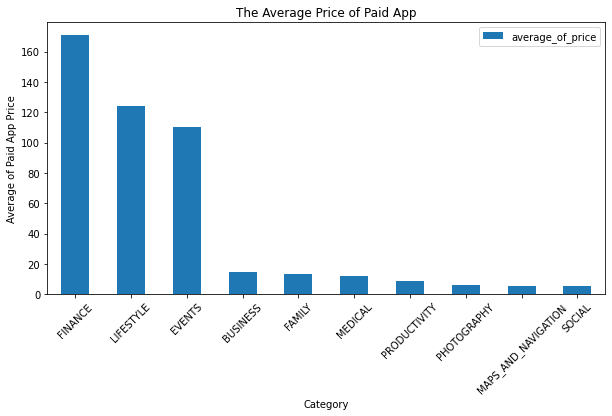

In [300]:
ax = top_10.plot(x= 'category', y = 'average_of_price', kind = 'bar', figsize = (10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Average of Paid App Price')
ax.set_title('The Average Price of Paid App')
plt.xticks(rotation = 45)
plt.show()

### 

In [323]:
paid_desc = apps[apps.Type == 'Paid'].groupby('Category').Price.describe()

In [332]:
paid_desc

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,3.0,1.990000,0.000000,1.99,1.990,1.990,1.990,1.99
AUTO_AND_VEHICLES,3.0,4.490000,4.769696,1.49,1.740,1.990,5.990,9.99
BOOKS_AND_REFERENCE,28.0,4.277500,2.019981,0.99,2.740,5.045,5.990,6.49
BUSINESS,12.0,14.607500,24.520126,0.99,3.740,4.990,14.240,89.99
COMMUNICATION,27.0,3.079259,3.640282,0.99,1.240,2.490,3.490,19.99
DATING,6.0,4.573333,2.457980,1.49,3.240,3.990,6.240,7.99
EDUCATION,4.0,4.490000,1.000000,3.99,3.990,3.990,4.490,5.99
ENTERTAINMENT,2.0,3.990000,1.414214,2.99,3.490,3.990,4.490,4.99
EVENTS,1.0,109.990000,NaN,109.99,109.990,109.990,109.990,109.99


#### To compare each category is not so much meaningful, because the amount of paid app is not enough for.
#### Most of Categories are sold less than 30

In [330]:
paid_desc_10 = paid_desc[paid_desc['count'] > 30].sort_values('mean', ascending= False).head(10)

In [331]:
paid_desc_10

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
FAMILY,183.0,13.113989,57.910697,0.99,1.99,2.99,4.990,399.99
MEDICAL,83.0,11.996386,24.837920,0.99,2.99,4.99,10.495,200.00
GAME,82.0,3.467195,3.242659,0.99,0.99,2.74,4.990,17.99
TOOLS,78.0,3.426282,3.620792,0.99,1.49,2.77,3.990,25.99
PERSONALIZATION,81.0,1.857778,1.495543,0.99,0.99,1.49,1.990,9.99


#### little bit meaningful to compare categories are paid more than 30.
#### Family and Medical categories have high std but anyway this categories are paid with higher price